In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [29]:
file=pd.read_csv("/content/Mall_Customers.csv")

In [30]:
file.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
file.drop('CustomerID',axis=1,inplace=True)

In [32]:
file['Genre'] = file['Genre'].map({'Male': 0, 'Female': 1})

In [33]:
file

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [34]:

# Feature Scaling (if necessary)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(file)

In [35]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

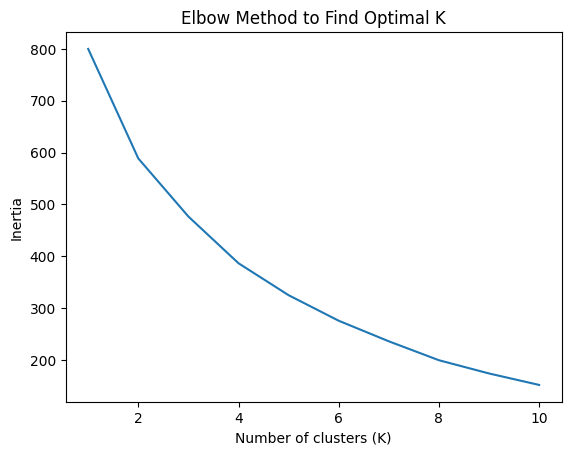

In [36]:
# Plot the Elbow method
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal K')
plt.show()

In [37]:
# Based on the plot, choose the optimal K (number of clusters)
optimal_k = 5

# Perform K-means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
kmeans_labels

# Add the cluster labels to the original data
file['Cluster'] = kmeans_labels

In [40]:
# Analyze the clusters (e.g., average spending for each cluster)
cluster_means = file.groupby('Cluster').mean()
print(cluster_means)

            Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        1.000000  28.345455           60.800000               68.654545
1        0.000000  28.250000           62.000000               71.675000
2        1.000000  48.720930           46.186047               39.674419
3        0.000000  55.903226           48.774194               38.806452
4        0.451613  40.419355           90.000000               15.741935
